# Data exploration

In [174]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
import numpy as np

In [33]:
from sklearn.cross_validation import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from scipy import interp
from sklearn.metrics import precision_score, recall_score, f1_score,accuracy_score

In [40]:
# import data
url='http://archive.ics.uci.edu/ml/machine-learning-databases/00225/Indian%20Liver%20Patient%20Dataset%20(ILPD).csv'
data=pd.read_csv(url,names=['age','gender','TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','AG','CLASS'])
data.head()

,age,gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,CLASS
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [38]:
type(data['CLASS'][1])

numpy.int64

In [41]:
# recode gender
encoder={'Female':1,'Male':0}
data['gender']=data['gender'].map(encoder)

#describe data
data.describe()

,age,gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,AG,CLASS
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,0.243568,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,0.429603,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,0.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,0.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f73497949e8>,
      dtype=object)

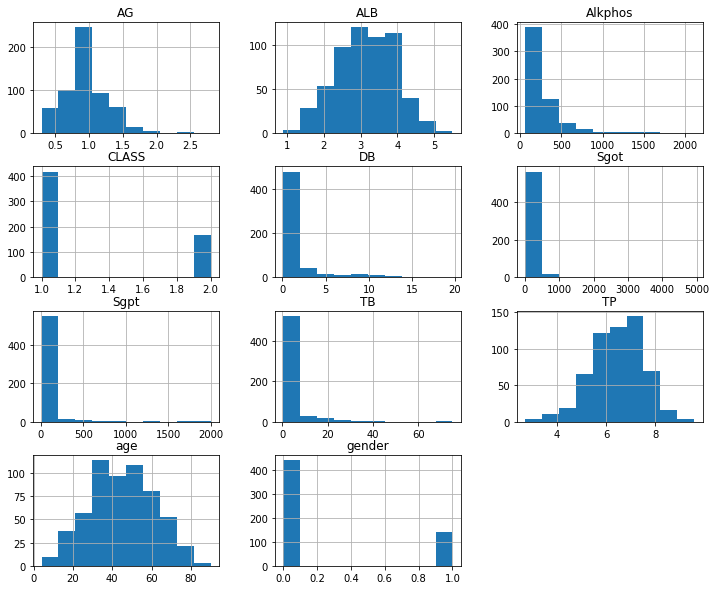

In [5]:
# visualize feature distribution
data.hist(figsize=(12,10))

age           AxesSubplot(0.125,0.657941;0.168478x0.222059)
gender     AxesSubplot(0.327174,0.657941;0.168478x0.222059)
TB         AxesSubplot(0.529348,0.657941;0.168478x0.222059)
DB         AxesSubplot(0.731522,0.657941;0.168478x0.222059)
Alkphos       AxesSubplot(0.125,0.391471;0.168478x0.222059)
Sgpt       AxesSubplot(0.327174,0.391471;0.168478x0.222059)
Sgot       AxesSubplot(0.529348,0.391471;0.168478x0.222059)
TP         AxesSubplot(0.731522,0.391471;0.168478x0.222059)
ALB              AxesSubplot(0.125,0.125;0.168478x0.222059)
AG            AxesSubplot(0.327174,0.125;0.168478x0.222059)
CLASS         AxesSubplot(0.529348,0.125;0.168478x0.222059)
dtype: object

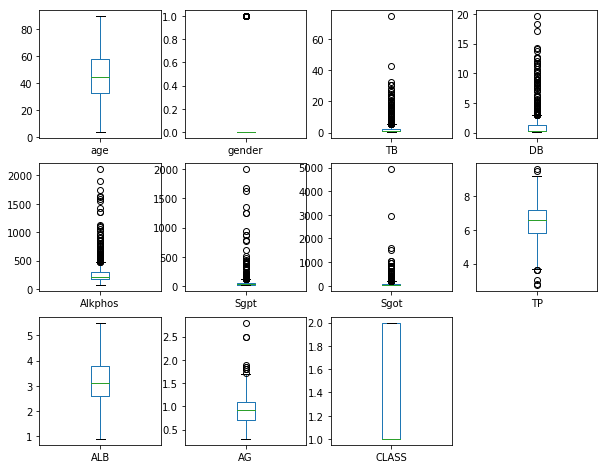

In [6]:
data.plot(kind= 'box' , subplots=True, layout=(3,4), sharex=False, sharey=False, figsize=(10,8))

Text(0.5,1,'Correlation Matrix for ILPD dataset')

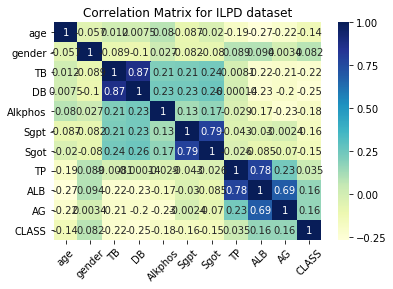

In [7]:
# explore feature relationship
corr = data.corr()
ax = sns.heatmap(corr, annot = True, cmap="YlGnBu")

plt.setp(ax.axes.get_xticklabels(), rotation=45)
plt.rcParams['figure.figsize']=(18,12)
plt.title('Correlation Matrix for ILPD dataset')

# Data cleaning

## impute missing data

In [42]:
# check missing data
data.isnull().sum()

age        0
gender     0
TB         0
DB         0
Alkphos    0
Sgpt       0
Sgot       0
TP         0
ALB        0
AG         4
CLASS      0
dtype: int64

In [43]:
#impute missing data
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='median', axis=0)
imr = imr.fit(data)
imputed_data = imr.transform(data.values)
data=pd.DataFrame(imputed_data,columns=['age','gender','TB','DB','Alkphos','Sgpt','Sgot','TP','ALB','AG','CLASS'])
data.isnull().sum()

age        0
gender     0
TB         0
DB         0
Alkphos    0
Sgpt       0
Sgot       0
TP         0
ALB        0
AG         0
CLASS      0
dtype: int64

## Partition data

In [44]:
# devide train and test dataset
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import LabelEncoder

X, y = data.iloc[:, 0:10].values, data.iloc[:, -1].values 
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = \
             train_test_split(X, y, test_size=0.3, random_state=0)

## balance data

In [11]:
!pip install imbalanced-learn

    100% |████████████████████████████████| 153kB 3.6MB/s eta 0:00:01
You are using pip version 9.0.3, however version 10.0.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [46]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE(random_state=100 ).fit_sample(X_train, y_train)
unique, counts = np.unique(y_train, return_counts=True)
dict(zip(unique, counts))

{0: 294, 1: 294}

# Feature engineering

## feature selection

In [47]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
def select(X,y,k):
# Create and fit selector
    selector = SelectKBest(chi2, k=k)
    selector.fit(X, y)
# Get idxs of columns to keep
    idxs = selector.get_support(indices=True)
# Create new dataframe with only desired columns, or overwrite existing
    X= X[:,idxs]
    return X,idxs

Text(0.5,0,'feature number')

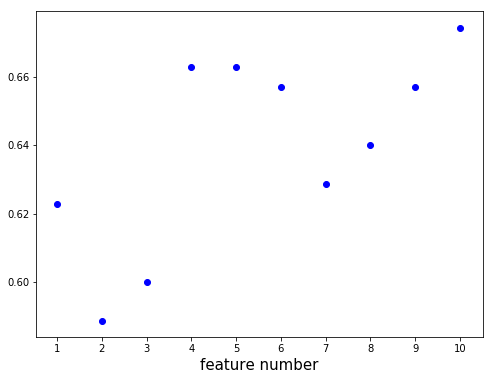

In [48]:
#select feature number for dicision tree

plt.figure(figsize=(8,6))
for i in range(1,11):
    X_train_sle,idxs=select(X_train,y_train,i)
    X_test_sle= X_test[:,idxs]

    model=DecisionTreeClassifier()
    model.fit(X_train_sle, y_train)

    scores = cross_val_score(estimator=model, X=X_train_sle, y=y_train,
                         cv=7, n_jobs=1)
    y_pred=model.predict(X_test_sle)
    
    plt.scatter(i,accuracy_score(y_true=y_test, y_pred=y_pred),c='b')
plt.xticks(range(1,11))
plt.xlabel('feature number',size =15)

Text(0.5,0,'feature number')

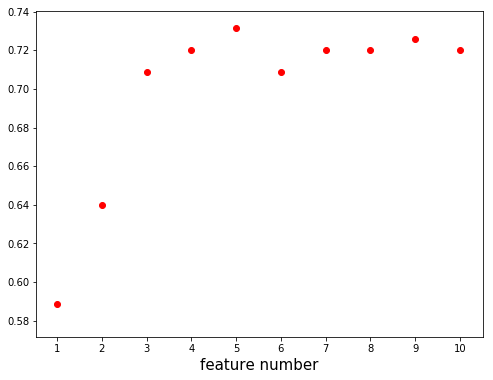

In [49]:
#select feature number for SVM
plt.figure(figsize=(8,6))
for i in range(1,11):
    X_train_sle,idxs=select(X_train,y_train,i)
    X_test_sle= X_test[:,idxs]

    model=SVC()
    model.fit(X_train_sle, y_train)

    scores = cross_val_score(estimator=model, X=X_train_sle, y=y_train,
                         cv=7, n_jobs=1)
    y_pred=model.predict(X_test_sle)
    
    plt.scatter(i,accuracy_score(y_true=y_test, y_pred=y_pred),c='r')
plt.xticks(range(1,11))
plt.xlabel('feature number',size =15)

## feature scaling

In [50]:
from sklearn.preprocessing import StandardScaler
def scale(X):
    sc = StandardScaler()
    return sc.fit_transform(X)    

## feature construction

In [51]:
from sklearn.decomposition import PCA
def construct(X):
    pca = PCA(n_components=None)
    return pca.fit_transform(X)

# Models

In [137]:
def save_result(clf,index_name,X_test,y_test,y_pred):
    result.loc[index_name]['precision']=precision_score(y_true=y_test, y_pred=y_pred)
    result.loc[index_name]['recall']=recall_score(y_true=y_test, y_pred=y_pred)
    result.loc[index_name]['accuracy']=accuracy_score(y_true=y_test, y_pred=y_pred)
    result.loc[index_name]['F1']=f1_score(y_true=y_test, y_pred=y_pred)
    result.loc[index_name]['auc']=metric_auc(clf,X_test,y_test)

In [53]:
def metric_auc(clf,X_test,y_test):
    probas = clf.predict_proba(X_test)
    fpr, tpr, thresholds = roc_curve(y_test, probas[:, 1], pos_label=1)
    roc_auc = auc(fpr, tpr)
    return roc_auc  

# Decision tree

## sensitive analysis- feature preprocess

In [110]:
result=pd.DataFrame(columns=['precision','recall','accuracy','F1','auc'], index=['no_engineering','only_select','only_scale','only_construction','select_scale','all'])

In [111]:
def chose_pre(X_train,X_test,method):
    dt=DecisionTreeClassifier(random_state=2 )
    dt.fit(X_train, y_train)
    scores = cross_val_score(estimator=dt, X=X_train, y=y_train,
                         cv=7, n_jobs=1)
    y_pred=dt.predict(X_test)
    save_result(dt,method,X_test,y_test,y_pred)

In [112]:
# no-preprocessing

chose_pre(X_train,X_test,'no_engineering')

# feature selection

X_train_s,idxs =select(X_train, y_train,5)
X_test_s= X_test[:,idxs]

chose_pre(X_train_s,X_test_s,'only_select')
# feature scale
X_train_s=scale(X_train)
X_test_s=scale(X_test)
chose_pre(X_train_s,X_test_s,'only_scale')

# feature construction
X_train_s=construct(scale(X_train))
X_test_s=construct(scale(X_test))
chose_pre(X_train_s,X_test_s,'only_construction')

# feature scale & selection
X_train_s,idxs=select(X_train,y_train,5)
X_test_s= X_test[:,idxs]
X_train_s=scale(X_train_s)
X_test_s=scale(X_test_s)
chose_pre(X_train_s,X_test_s,'select_scale')

# all
X_train_s,idxs=select(X_train,y_train,5)
X_test_s= X_test[:,idxs]
X_train_s=construct(scale(X_train_s))
X_test_s=construct(scale(X_test_s))
chose_pre(X_train_s,X_test_s,'all')

In [113]:
result

,precision,recall,accuracy,F1,auc
no_engineering,0.44,0.415094,0.662857,0.427184,0.592793
only_select,0.45098,0.433962,0.668571,0.442308,0.602227
only_scale,0.395604,0.679245,0.588571,0.5,0.614213
only_construction,0.402062,0.735849,0.588571,0.52,0.63022
select_scale,0.430233,0.698113,0.628571,0.532374,0.648237
all,0.391304,0.339623,0.64,0.363636,0.555057


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

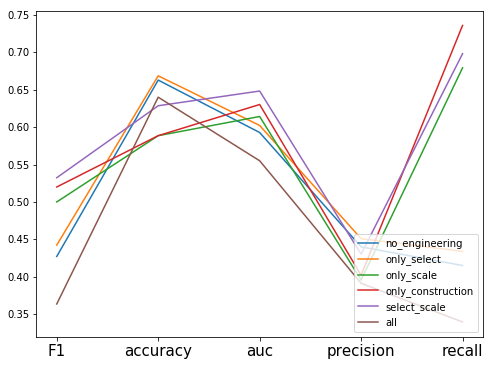

In [114]:
plt.figure(figsize=(8,6))
for index_name in result.index:
    x=result.columns
    y=result.loc[index_name]
   
    new_x, new_y = zip(*sorted(zip(x, y)))
    plt.plot(new_x, new_y)
plt.legend(result.index , loc='lower right')
plt.xticks(size=15)


## preliminary analysis


In [115]:
# use feature selection and feature rescale
X_train_dt,idxs=select(X_train,y_train,5)
X_test_dt= X_test[:,idxs]

X_train_dt=scale(X_train_dt)
X_test_dt=scale(X_test_dt)

Text(0.5,0,'max depth of decision tree')

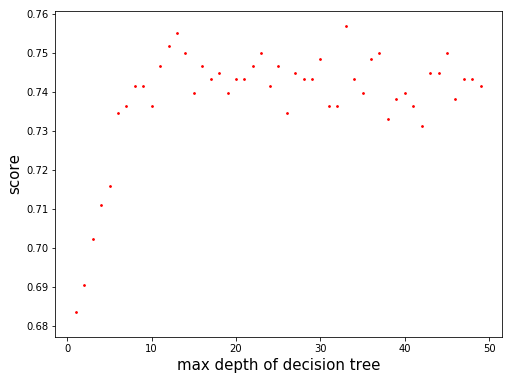

In [116]:
plt.figure(figsize=(8,6))
for depth in range(1,50):
    tree=DecisionTreeClassifier(max_depth=depth).fit(X_train_dt,y_train)
    scores = cross_val_score(estimator=tree,
                         X=X_train_s,
                         y=y_train,
                         cv=7,
                         n_jobs=1)
    plt.scatter(depth,np.mean(scores), c='r', s=3)
plt.ylabel('score',size=15)
plt.xlabel('max depth of decision tree',size=15)

Text(0.5,0,'minimum sample to split ')

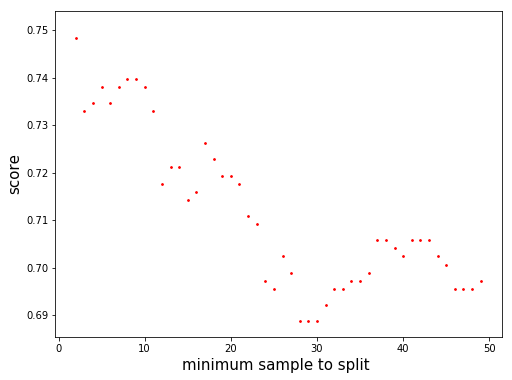

In [117]:
plt.figure(figsize=(8,6))
for split in range(2,50):
    tree=DecisionTreeClassifier(min_samples_split=split).fit(X_train_dt,y_train)
    scores = cross_val_score(estimator=tree,
                         X=X_train_s,
                         y=y_train,
                         cv=7,
                         n_jobs=1)
    plt.scatter(split,np.mean(scores), c='r', s=3)
plt.ylabel('score',size=15)
plt.xlabel('minimum sample to split ',size=15)

## hyper parameter--sensitivity analysis

In [118]:
def DT_tune(X_train, y_train):
    param_grid = {'max_depth': np.arange(1, 30),'criterion':['gini','entropy'],'min_samples_split' : np.arange(2, 15)}

    tree = GridSearchCV(DecisionTreeClassifier(random_state=2), param_grid,
                    scoring='accuracy',
                    cv=6, n_jobs=1)

    tree=tree.fit(X_train, y_train)
    print('--> Tuned Parameters Best Score: ',tree.best_score_)
    print('--> Best Parameters: \n',tree.best_params_)
    return tree

In [119]:
tree=DT_tune(X_train_dt,y_train)

--> Tuned Parameters Best Score:  0.7380952380952381
--> Best Parameters: 
 {'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 8}


In [120]:
#Use best parameters
clf_dt = tree.best_estimator_

#Get Final Scores
clf_dt.fit(X_train_dt, y_train)
scores = cross_val_score(estimator=clf_dt,
                         X=X_train_dt,
                         y=y_train,
                         cv=6,
                         n_jobs=1)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % clf_dt.score(X_test_dt,y_test))

--> Final Model Training Accuracy: 0.738 +/- 0.055
--> Final Accuracy on Test set: 0.65143


In [121]:
tree_para=pd.DataFrame.from_dict(tree.cv_results_ )[['param_criterion','param_max_depth','param_min_samples_split','rank_test_score']]

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda

In [122]:
tree_para[tree_para['rank_test_score']==1]

,param_criterion,param_max_depth,param_min_samples_split,rank_test_score
123,gini,10,8,1
474,entropy,8,8,1


Text(0.5,1,'Entropy')

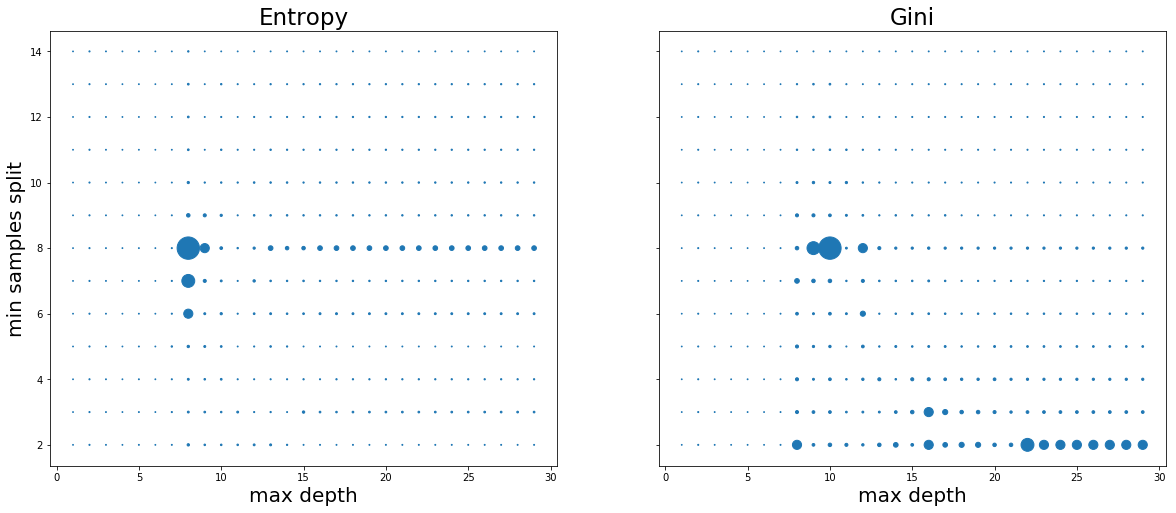

In [123]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharey='row',figsize=(20, 8))

gini=tree_para[tree_para['param_criterion']=='gini']
entropy=tree_para[tree_para['param_criterion']=='entropy']
g=axes[1].scatter(gini['param_max_depth'],gini['param_min_samples_split'],s=500/gini['rank_test_score'])
axes[0].scatter(entropy['param_max_depth'],entropy['param_min_samples_split'],s=500/entropy['rank_test_score'])
axes[0].set_ylabel('min samples split', size=20)
axes[1].set_xlabel('max depth',size=20)
axes[0].set_xlabel('max depth',size=20)
axes[1].set_title('Gini',size=23)
axes[0].set_title('Entropy',size=23)


In [124]:
y_pred = clf_dt.predict(X_test_dt)
print(confusion_matrix(y_test,y_pred))

[[76 46]
 [15 38]]


In [125]:
metric_auc(clf_dt,X_test_dt,y_test)

0.7061552737395608

# SVM

In [126]:
result=pd.DataFrame(columns=['precision','recall','accuracy','F1','auc'], index=['no_engineering','only_select','only_scale','only_construction','select_scale','all'])

In [138]:
def chose_pre(X_train,X_test,method):
    svm=SVC(probability=True,random_state=2)
    svm.fit(X_train, y_train)
    scores = cross_val_score(estimator=svm, X=X_train, y=y_train,
                         cv=7, n_jobs=1)
    y_pred=svm.predict(X_test)
    save_result(svm,method,X_test,y_test,y_pred)

In [139]:
# no-preprocessing

chose_pre(X_train,X_test,'no_engineering')

# feature selection

X_train_s,idxs =select(X_train, y_train,5)
X_test_s= X_test[:,idxs]

chose_pre(X_train_s,X_test_s,'only_select')
# feature scale
X_train_s=scale(X_train)
X_test_s=scale(X_test)
chose_pre(X_train_s,X_test_s,'only_scale')

# feature construction
X_train_s=construct(scale(X_train))
X_test_s=construct(scale(X_test))
chose_pre(X_train_s,X_test_s,'only_construction')

# feature scale & selection
X_train_s,idxs=select(X_train,y_train,5)
X_test_s= X_test[:,idxs]
X_train_s=scale(X_train_s)
X_test_s=scale(X_test_s)
chose_pre(X_train_s,X_test_s,'select_scale')

# all
X_train_s,idxs=select(X_train,y_train,5)
X_test_s= X_test[:,idxs]
X_train_s=construct(scale(X_train_s))
X_test_s=construct(scale(X_test_s))
chose_pre(X_train_s,X_test_s,'all')

In [140]:
result

,precision,recall,accuracy,F1,auc
no_engineering,0.833333,0.0943396,0.72,0.169492,0.582663
only_select,0.8,0.150943,0.731429,0.253968,0.567584
only_scale,0.465347,0.886792,0.657143,0.61039,0.747912
only_construction,0.392157,0.754717,0.571429,0.516129,0.680946
select_scale,0.432203,0.962264,0.605714,0.596491,0.778843
all,0.435897,0.962264,0.611429,0.6,0.758274


([0, 1, 2, 3, 4], <a list of 5 Text xticklabel objects>)

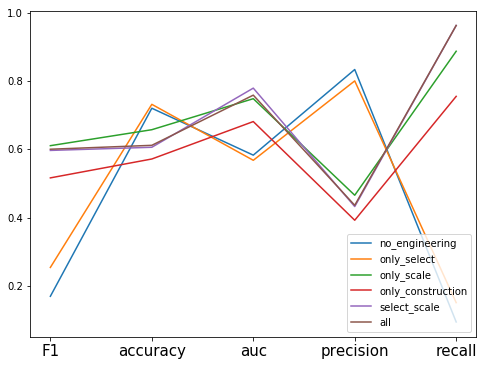

In [142]:
plt.figure(figsize=(8,6))
for index_name in result.index:
    x=result.columns
    y=result.loc[index_name]
   
    new_x, new_y = zip(*sorted(zip(x, y)))
    plt.plot(new_x, new_y)
plt.legend(result.index, loc='lower right')
plt.xticks(size=15)

## sensitive analysis

In [143]:
X_train_s,idxs=select(X_train,y_train,5)
X_test_s= X_test[:,idxs]

X_train_s=scale(X_train_s)
X_test_s=scale(X_test_s)

## linear kernel

In [144]:
def explore(linear_c):
    for i in linear_c:
        svm=SVC(C=i,kernel='linear')
        scores = cross_val_score(estimator=svm,X=X_train_s,y=y_train, cv=7, n_jobs=1)
        plt.scatter(i,np.mean(scores), c='r', s=3)


Text(0.5,0,' parameter C ')

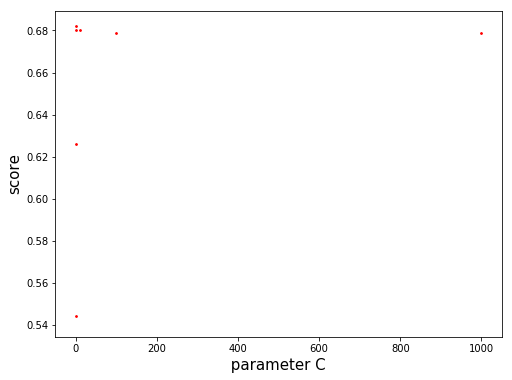

In [145]:
plt.figure(figsize=(8,6))
linear_c = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
explore(linear_c)
plt.ylabel('score',size=15)
plt.xlabel(' parameter C ',size=15)

Text(0.5,0,' linear parameter C ')

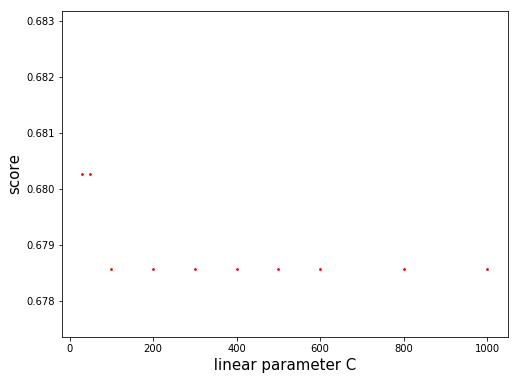

In [146]:
plt.figure(figsize=(8,6))
linear_c = [30 ,50,100,200,300,400,500,600,800,1000]
explore(linear_c)
plt.ylabel('score',size=15)
plt.xlabel(' linear parameter C ',size=15)

## rbf kernel

In [147]:
def explore(rbf_C):
    for i in rbf_C:
        svm=SVC(C=i,kernel='rbf')
        scores = cross_val_score(estimator=svm,X=X_train_s,y=y_train, cv=7, n_jobs=1)
        plt.scatter(i,np.mean(scores), c='r', s=3)

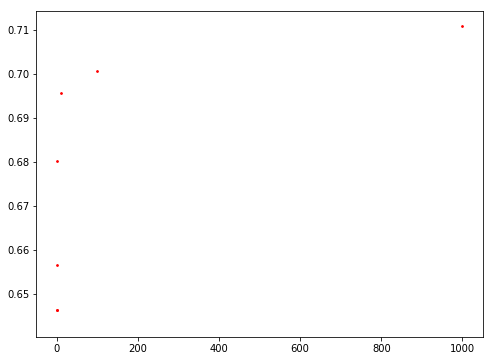

In [148]:
plt.figure(figsize=(8,6))
rbf_C = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
explore(rbf_C)

Text(0.5,0,' rbf parameter C ')

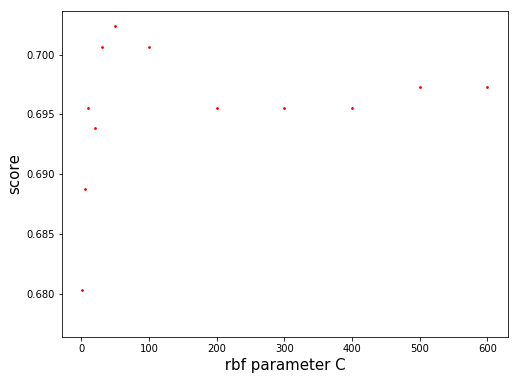

In [149]:
plt.figure(figsize=(8,6))
rbf_C = [1,5,10,20,30 ,50,100,200,300,400,500,600]
explore(rbf_C)
plt.ylabel('score',size=15)
plt.xlabel(' rbf parameter C ',size=15)

In [150]:
def explore(gamma):
    for i in gamma:
        svm=SVC(gamma=i,kernel='rbf')
        scores = cross_val_score(estimator=svm,X=X_train_s,y=y_train, cv=7, n_jobs=1)
        plt.scatter(i,np.mean(scores), c='r', s=3)

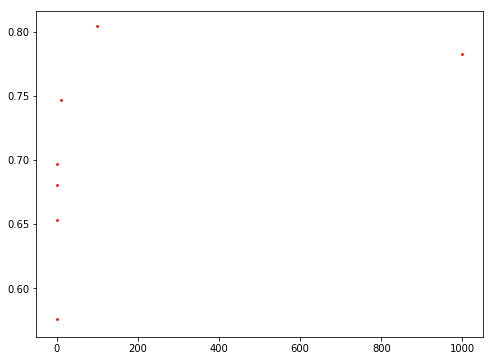

In [151]:
plt.figure(figsize=(8,6))
gamma = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
explore(gamma)

Text(0.5,0,' rbf gamma  ')

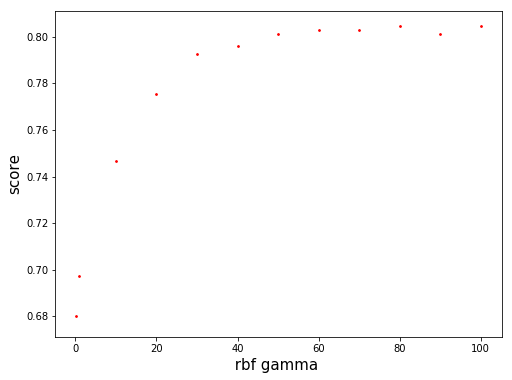

In [152]:
plt.figure(figsize=(8,6))
gamma  = [ 0.1, 1.0, 10.0,20,30,40, 50,60,70,80,90, 100.0]
explore(gamma)
plt.ylabel('score',size=15)
plt.xlabel(' rbf gamma  ',size=15)

### sigmoid

In [153]:
def explore(sigmoid_c):
    for i in sigmoid_c:
        svm=SVC(C=i, kernel='sigmoid')
        scores = cross_val_score(estimator=svm,X=X_train_s,y=y_train, cv=7, n_jobs=1)
        plt.scatter(i,np.mean(scores), c='r', s=3)

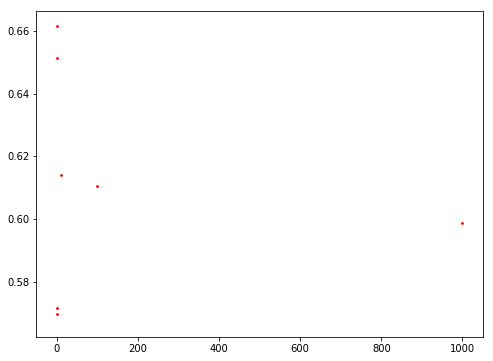

In [154]:
plt.figure(figsize=(8,6))
sigmoid_c =[0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
explore(sigmoid_c)

Text(0.5,0,' sigmoid parameter C ')

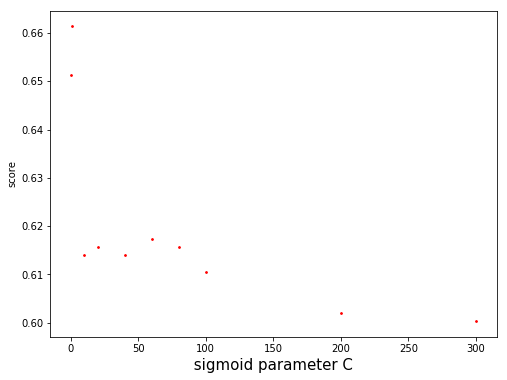

In [155]:
plt.figure(figsize=(8,6))
sigmoid_c  =[ 0.1, 1.0, 10.0,20,40,60,80, 100.0,200,300]
explore(sigmoid_c)
plt.ylabel('score')
plt.xlabel(' sigmoid parameter C ',size=15)

In [156]:
def explore(gamma):
    for i in gamma:
        svm=SVC(gamma=i,kernel='sigmoid')
        scores = cross_val_score(estimator=svm,X=X_train_s,y=y_train, cv=7, n_jobs=1)
        plt.scatter(i,np.mean(scores), c='r', s=3)

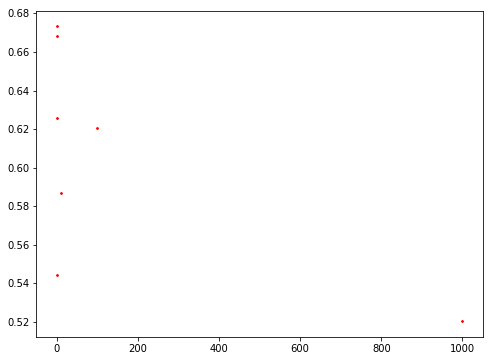

In [157]:
plt.figure(figsize=(8,6))
gamma = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
explore(gamma)


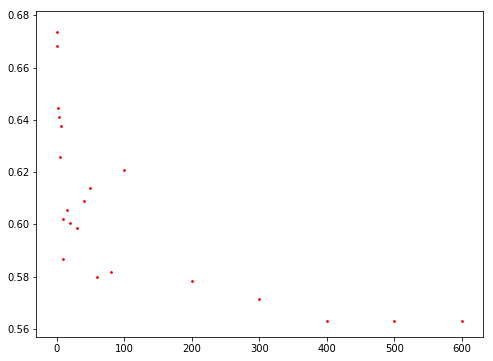

In [158]:
plt.figure(figsize=(8,6))
gamma =[ 0.1, 1.0,2,3,5,7,9,10.0,15,20,30,40,50,60,80, 100.0,200,300,400,500,600]
explore(gamma)

Text(0.5,0,' sigmoid gamma ')

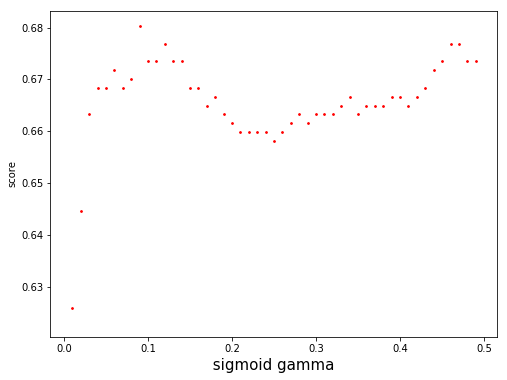

In [159]:
plt.figure(figsize=(8,6))
gamma = np.arange(0.01,0.5,.01)
explore(gamma)
plt.ylabel('score')
plt.xlabel(' sigmoid gamma ',size=15)

In [160]:
def explore(cof):
    for i in cof:
        svm=SVC(coef0=i,kernel='sigmoid')
        scores = cross_val_score(estimator=svm,X=X_train_s,y=y_train, cv=7, n_jobs=1)
        plt.scatter(i,np.mean(scores), c='r', s=3)

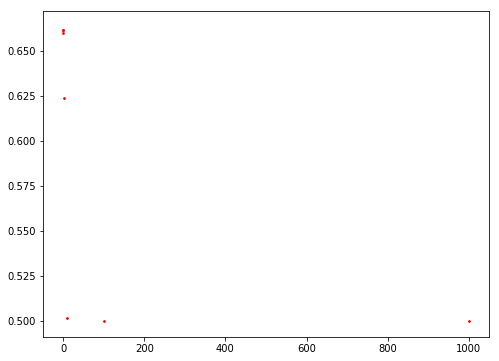

In [161]:
plt.figure(figsize=(8,6))
cof = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0]
explore(cof)

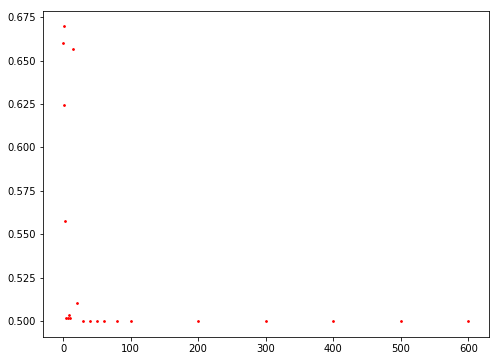

In [162]:
plt.figure(figsize=(8,6))
cof = [ 0.1, 1.0,2,3,5,7,9,10.0,15,20,30,40,50,60,80, 100.0,200,300,400,500,600]
explore(cof)

Text(0.5,0,' sigmoid coefficient ')

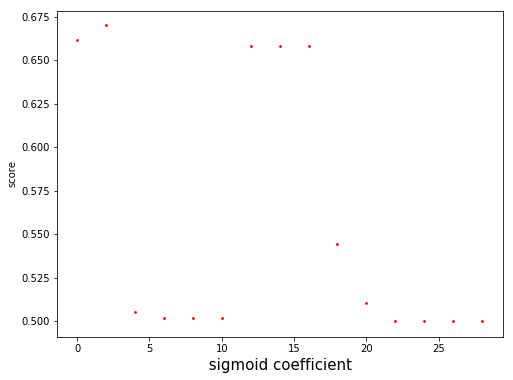

In [163]:
plt.figure(figsize=(8,6))
cof = np.arange(0,30,2)
explore(cof)
plt.ylabel('score')
plt.xlabel(' sigmoid coefficient ',size=15)


## hyper parameter tuning

In [196]:
def SVM_tune(X_train, y_train):
    linear_C=param_range =np.arange(0.1, 200, 20).tolist()
    
    rbf_C = np.arange(10,200, 10).tolist()
    rbf_gamma=np.arange(30, 130, 10).tolist()
    
    sigmoid_c=np.arange(0.01, 50.01, 10).tolist()
    sigmoid_gamma=np.arange(0, 0.25, 0.02).tolist()
    sigmoid_cof=np.arange(0, 20,4).tolist()
    
    param_grid = [{'C': linear_C,'kernel': ['linear']},
              {'C': rbf_C,'gamma': rbf_gamma,'kernel': ['rbf']},
              {'C': sigmoid_c,'gamma': sigmoid_gamma,'coef0': sigmoid_cof,'kernel': ['sigmoid']}]
           

    gs_svc = GridSearchCV(SVC(probability=True,random_state=2), param_grid,
                  scoring='accuracy',
                  cv=10,  n_jobs=3)
   
    gs_svc=gs_svc.fit(X_train, y_train)
    print('--> Tuned Parameters Best Score: ',gs_svc.best_score_)
    print('--> Best Parameters: \n',gs_svc.best_params_)
    return gs_svc

In [197]:
X_train_s=scale(X_train)
X_test_s=scale(X_test)
svm=SVM_tune(X_train_s,y_train)

--> Tuned Parameters Best Score:  0.7142857142857143
--> Best Parameters: 
 {'C': 20.1, 'kernel': 'linear'}


In [191]:
#Use best parameters
clf_svm = svm.best_estimator_
#all_para=pd.DataFrame.from_dict(svm.cv_results_ )

#Get Final Scores
clf_svm.fit(X_train_s, y_train)
scores = cross_val_score(estimator=clf_svm,
                         X=X_train_s,
                         y=y_train,
                         cv=7,
                         n_jobs=1)
print('--> Final Model Training Accuracy: %.3f +/- %.3f' %(np.mean(scores), np.std(scores)))

print('--> Final Accuracy on Test set: %.5f' % clf_svm.score(X_test_s,y_test))

--> Final Model Training Accuracy: 0.709 +/- 0.043
--> Final Accuracy on Test set: 0.60571


In [192]:
svm_para=pd.DataFrame.from_dict(svm.cv_results_ )[['param_C','param_coef0','param_gamma','param_kernel','rank_test_score']]


/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/home/nbuser/anaconda

In [179]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5,0,'param_C')

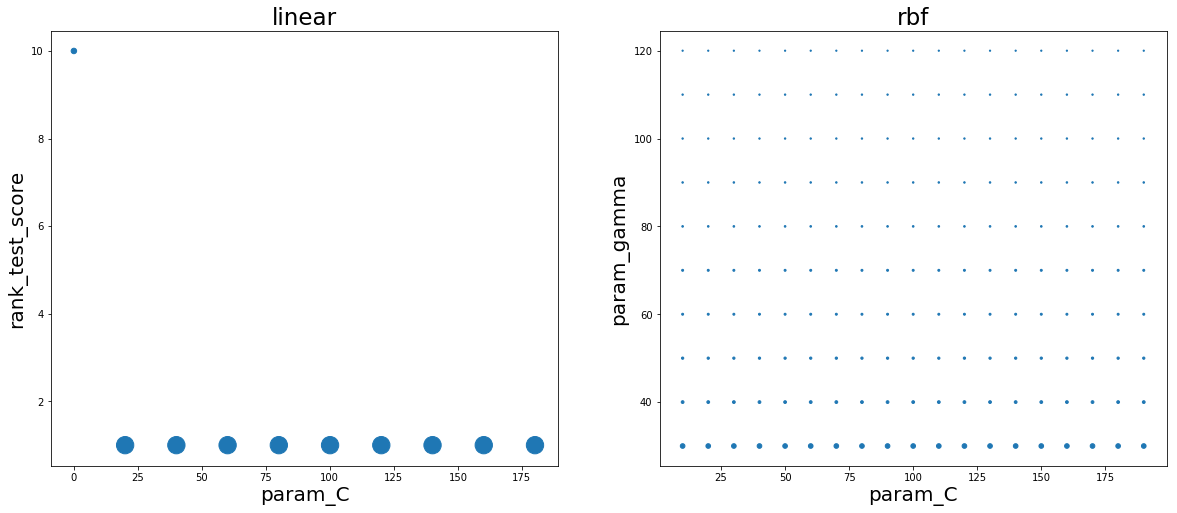

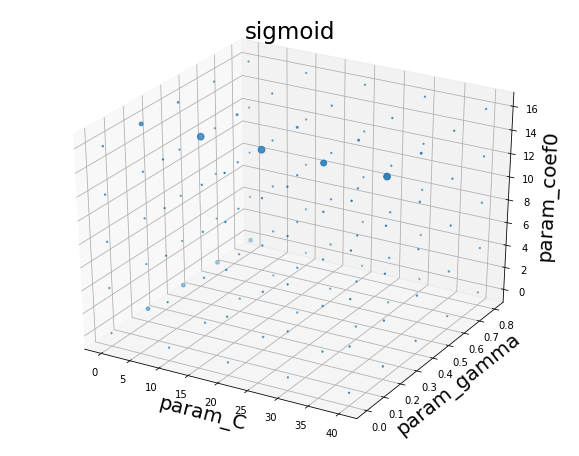

In [195]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(20, 8))

linear=svm_para[svm_para['param_kernel']=='linear']
rbf=svm_para[svm_para['param_kernel']=='rbf']
sig=svm_para[svm_para['param_kernel']=='sigmoid']

axes[0].scatter(linear['param_C'],linear['rank_test_score'],s=300/linear['rank_test_score'])
axes[1].scatter(rbf['param_C'],rbf['param_gamma'],s=300/rbf['rank_test_score'])
axes[0].set_xlabel('param_C',size=20)
axes[1].set_xlabel('param_C',size=20)

axes[0].set_ylabel('rank_test_score', size=20)
axes[1].set_ylabel('param_gamma',size=20)

axes[1].set_title('rbf',size=23)
axes[0].set_title('linear',size=23)


fig = plt.figure(figsize=(10,8))
ax= fig.add_subplot(111, projection='3d')
ax.scatter(sig['param_C'],sig['param_gamma'],sig['param_coef0'],s=500/sig['rank_test_score'])
ax.set_ylabel('param_gamma',size=20)
ax.set_zlabel('param_coef0',size=20)
ax.set_title('sigmoid',size=23)
ax.set_xlabel('param_C',size=20)

In [193]:
y_pred = clf_svm.predict(X_test_s)
print(confusion_matrix(y_test,y_pred))

[[56 66]
 [ 3 50]]


In [194]:
metric_auc(clf_svm,X_test_s,y_test)

0.7394061243427157

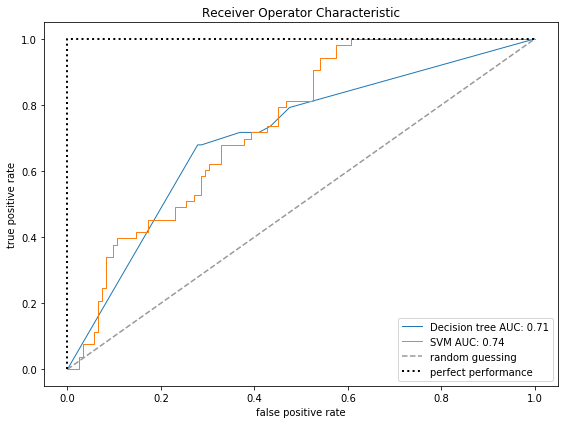

In [183]:

fig = plt.figure(figsize=(8, 6))
all_tpr = []


 # ROC of decision tree   
dt_probas = clf_dt.predict_proba(X_test_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt_probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
current_auc = str('%.2f' %roc_auc)
    
plt.plot(fpr, tpr, lw=1, 
             label= str('Decision tree' + ' AUC: ' + current_auc))

# ROC of SVM    
svm_probas = clf_svm.predict_proba(X_test_s)
fpr, tpr, thresholds = roc_curve(y_test, svm_probas[:, 1], pos_label=1)
roc_auc = auc(fpr, tpr)
current_auc = str('%.2f' %roc_auc)
    
plt.plot(fpr, tpr, lw=1, 
             label= str('SVM' + ' AUC: ' + current_auc))    
    
    
plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         color=(0.6, 0.6, 0.6), 
         label='random guessing')

plt.plot([0, 0, 1], 
         [0, 1, 1], 
         lw=2, 
         linestyle=':', 
         color='black', 
         label='perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('Receiver Operator Characteristic')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()

In [184]:
result=pd.DataFrame(columns=['precision','recall','accuracy','F1','auc'], index=['decision tree', 'SVM'])

In [186]:
y_pred=clf_svm.predict(X_test_s)
save_result(clf_svm,'SVM',X_test_s,y_test,y_pred)
y_pred=clf_dt.predict(X_test_dt)
save_result(clf_dt,'decision tree',X_test_dt,y_test,y_pred)

In [187]:
result

,precision,recall,accuracy,F1,auc
decision tree,0.452381,0.716981,0.651429,0.554745,0.706155
SVM,0.426087,0.924528,0.6,0.583333,0.739406


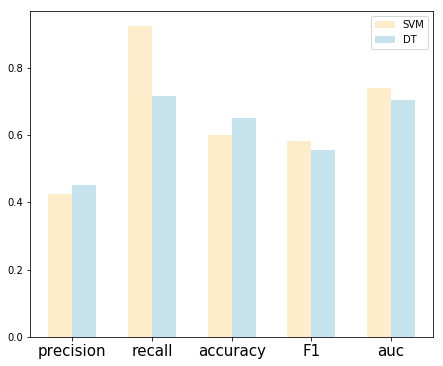

In [188]:
fig, ax = plt.subplots( figsize=(8,6))
fig.subplots_adjust(left=0.2, wspace=0.6)
ind = np.arange(5)


ax.bar(ind,result.loc['SVM'], color='moccasin', alpha=0.7,label='SVM',width=0.3)
ax.set_xticks([0.15,1.15,2.15,3.15,4.15])
ax.bar(ind+0.3,result.loc['decision tree'],color='lightblue', alpha=0.7, label='DT',width=0.3)
ax.set_xticklabels(result.columns, size=15)
ax.legend()